Name - Ashutosh Jha



### **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###**Importing the dataset**

The **Heart Disease** dataset was downloaded from - https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [ ]:
dataset = pd.read_csv('./drive/My Drive/Colab Notebooks/AI-Class-CIC/Assignment-2/heart.csv')

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

###**Data Analysis**

As in 'ca' column, according to the data information, the values must be 0-3 (4 values) but in dataset 'ca' column contains values from 0-4 (5 values) which may be an error. So, 5th value i.e. '4' is converted to missing value (NaN)

In [ ]:
dataset['ca'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
dataset.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [ ]:
dataset[dataset['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [ ]:
dataset.loc[dataset['ca']==4, 'ca'] = np.NaN

In [ ]:
dataset['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

Similarly in 'thal column, according to data information, the values must be from 1-3 but in dataset, 'thal' column contains values from 0-3. So the '0' value is converted to missing value (NaN).

In [ ]:
dataset.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [ ]:
dataset.loc[dataset['thal']==0, 'thal'] = np.NaN

In [ ]:
dataset[dataset['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
dataset['thal'].unique()

array([ 1.,  2.,  3., nan])

Now, we have, in total, 7 missing values as shown below -

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

Heatmap plot to show missing values individually in each column -

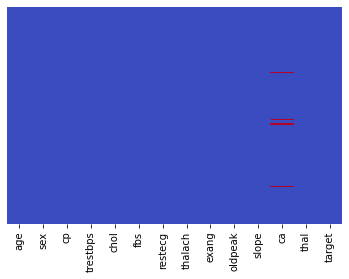

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

Missing values are then converted to the mode of their respective column -

In [ ]:
dataset['ca'] = dataset['ca'].fillna(dataset['ca'].mode()[0])

In [ ]:
dataset['thal'] = dataset['thal'].fillna(dataset['thal'].mode()[0])

Again checking for missing values -

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

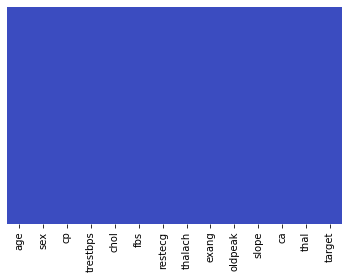

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

Removing all the duplicate rows from the dataset (if any) - 

In [ ]:
dataset.duplicated().sum()

1

In [ ]:
dataset[dataset.duplicated(keep=False)].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [ ]:
dataset = dataset.drop(dataset.index[163])

In [ ]:
dataset.duplicated().sum()

0

Statistical Analysis of the dataset -

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.665563,2.327815,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.935142,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


Making a copy of the dataset - 

In [ ]:
dataset1 = dataset.copy()

In [ ]:
dataset1.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


Converting the label values to their actual categorical values in order to make the visualisation through graph plots easier - 

In [ ]:
dataset1['target'] = dataset1.target.replace({1:'Disease', 0:'No Disease'})
dataset1['sex'] = dataset1.sex.replace({1:'Male', 0:'Female'})
dataset1['cp'] = dataset1.cp.replace({0:'typical_angina', 1:'atypical_angina', 2:'non-angical pain', 3:'asymtomatic'})
dataset1['exang'] = dataset1.exang.replace({1:'Yes', 0:'No'})
dataset1['fbs'] = dataset1.fbs.replace({1:'True', 0:'False'})
dataset1['slope'] = dataset1.slope.replace({0:'upsloping', 1:'flat', 2:'downsloping'})
dataset1['thal'] = dataset1.thal.replace({1:'fixed_defect', 2:'reversable_defect', 3:'normal'})

Plotting Box Plots to detect outliers

age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
sex         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
cp          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
trestbps    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chol        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
fbs         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
restecg     AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
thalach           AxesSubplot(0.125,0.125;0.0945122x0.343182)
exang          AxesSubplot(0.238415,0.125;0.0945122x0.343182)
oldpeak        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
slope          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
ca             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
thal           AxesSubplot(0.692073,0.125;0.0945122x0.343182)
target         AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

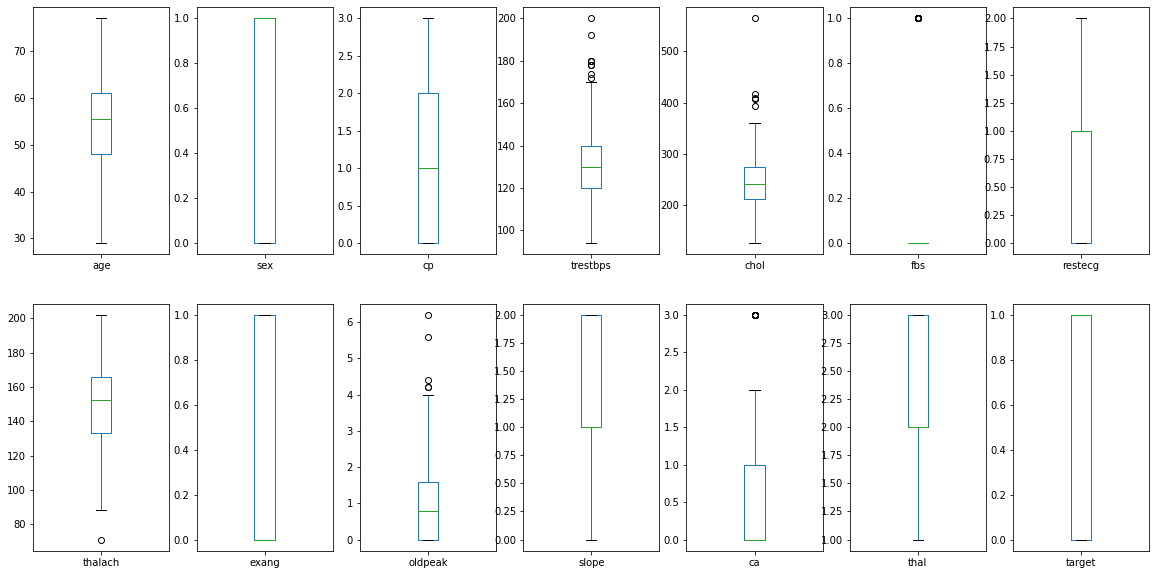

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False, figsize=(20,10))

Removing all the outliers detected - 

In [ ]:
real_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print('Number of outliers in - ')
for feature in real_features:
  q1 = np.percentile(dataset1[feature], 25.)
  q3 = np.percentile(dataset1[feature], 75.)
  i_range = q3 - q1
  step_outlier = i_range*1.5
  outliers = dataset1[feature][~((dataset1[feature] >= q1 - step_outlier) & (dataset1[feature] <= q3 + step_outlier))].index.tolist()
  print(feature+' : '+str(len(outliers)))
  dataset1.drop(outliers, inplace=True)
  print('Outlier dropped.')

Number of outliers in - 
age : 0
Outlier dropped.
trestbps : 9
Outlier dropped.
chol : 5
Outlier dropped.
thalach : 1
Outlier dropped.
oldpeak : 4
Outlier dropped.


**Target Column Distribution -**

Disease       158
No Disease    125
Name: target, dtype: int64
Disease : 55.83 %
Non-Disease : 44.17 %


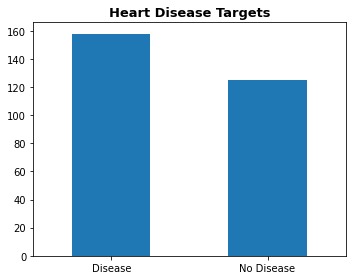

In [ ]:
print(dataset1.target.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No Disease"]
ax = dataset1.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Targets", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

disease_percent = round(len(dataset1[dataset1['target']=='Disease'])*100/dataset1.shape[0],2)
non_disease_percent = round(len(dataset1[dataset1['target']=='No Disease'])*100/dataset1.shape[0],2)

plt.tight_layout()

print('Disease : '+str(disease_percent)+' %')
print('Non-Disease : '+str(non_disease_percent)+' %')

There are more people who are diseased than non-diseased.

**Age Column Distribution -** 

Text(0.5, 1.0, 'Age Distribution')

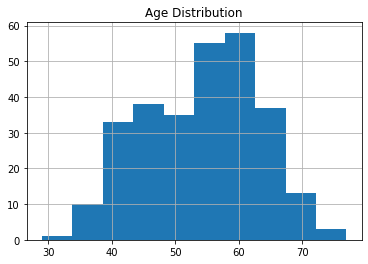

In [ ]:
dataset1['age'].hist().plot(lind='bar')
plt.title('Age Distribution')

There are more people who fall in the age range of 53 - 59 and less people who fall in the range of 29 - 35.

**Cholestrol Column Distribution -** 

Text(0.5, 1.0, 'Cholestrol Distribution')

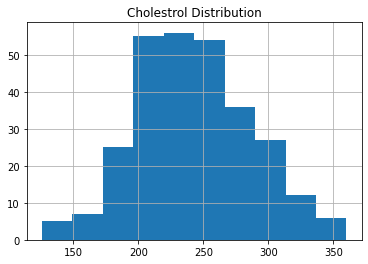

In [ ]:
dataset1['chol'].hist().plot(lind='bar')
plt.title('Cholestrol Distribution')

Most of the people have cholestrol in range of 200-260 and very few people have cholestrol in the range of 75 - 150 and 325 - 365 .

**ST Depression (oldpeak) Column Distribution -** 

Text(0.5, 1.0, 'ST Depression Distribution')

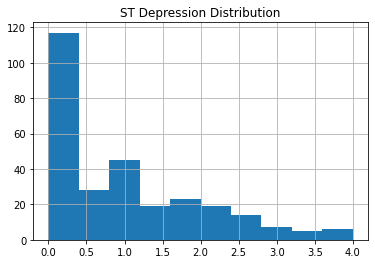

In [ ]:
dataset1['oldpeak'].hist().plot(lind='bar')
plt.title('ST Depression Distribution')

Most of the people have Depression value less than 0.4.

**Heart Rate (thalach) Column Distribution -** 

Text(0.5, 1.0, 'Heart Rate Distribution')

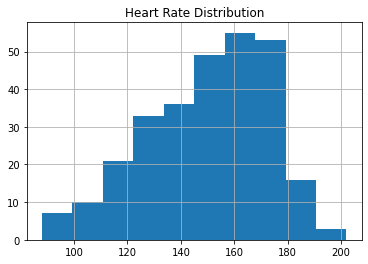

In [ ]:
dataset1['thalach'].hist().plot(lind='bar')
plt.title('Heart Rate Distribution')

Maximum heart rate is achieved in range 150 - 180 for most of the people while the same is as low as 50 and as high as 200 for some of the people.

**Resting Blood Pressure (trestbps) Column Distribution -** 

Text(0.5, 1.0, 'Resting Blood Pressure Distribution')

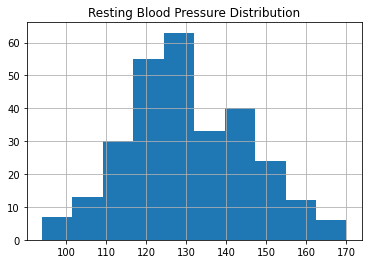

In [ ]:
dataset1['trestbps'].hist().plot(lind='bar')
plt.title('Resting Blood Pressure Distribution')

More than 50 people have normal blood pressure at rest state in the range of 118 - 132 while very few (nearly less than 10) have very high blood pressure and very low blood pressure respectively at rest state.

**Sex Distribution according to Target -** 

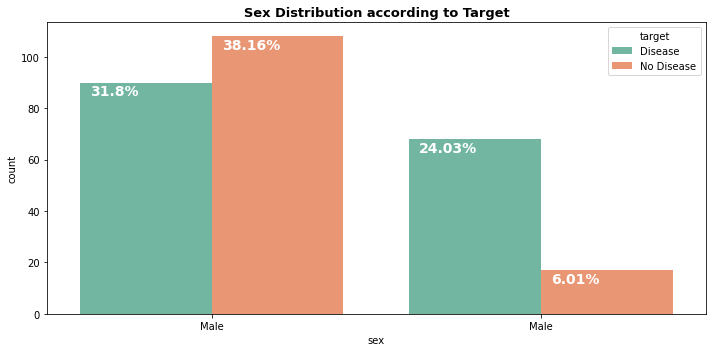

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = dataset1['sex']
ax = sns.countplot(x='sex', hue='target', data=dataset1, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Among the disease infected people, number of men is higher than that of women.

**Chest Pain Distribution according to Target -** 

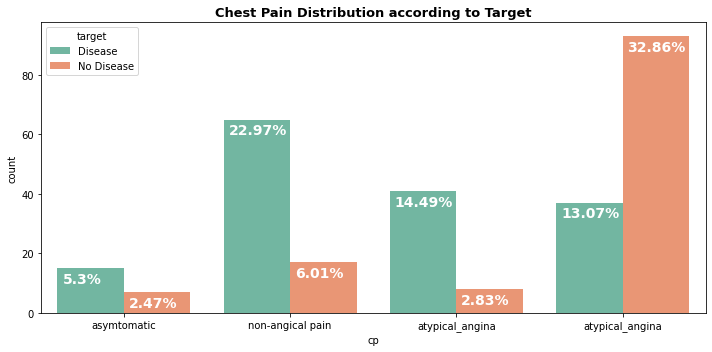

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
name = dataset1['cp']
ax = sns.countplot(x='cp', hue='target', data=dataset1, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Among the disease infected people, approx 23 percent were suffering from non-angical pain while among the non-disease people, approx 33 percent were suffering from atypical_angina.

**Fasting Blood Sugar Distribution acording to Target -** 

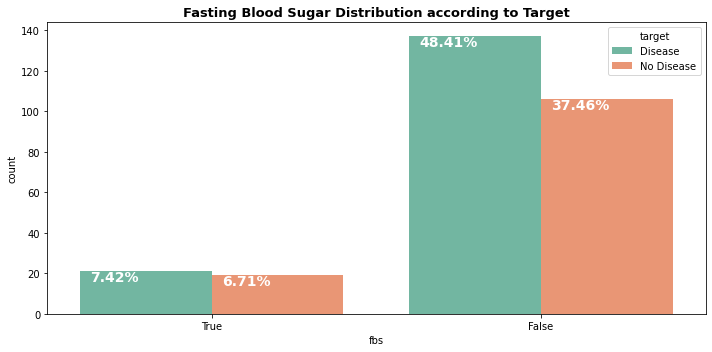

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = dataset1['fbs']
ax = sns.countplot(x='fbs', hue='target', data=dataset1, palette='Set2')
ax.set_title("Fasting Blood Sugar Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

There are approx 7 percent people who are disease infected and also suffering from diabetes while approx 48 percent were suffering from disease but not from diabetes.

**Slope Distribution according to Target -** 

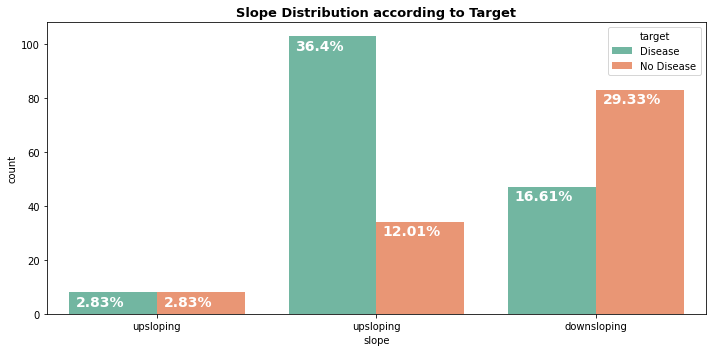

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = dataset1['slope']
ax = sns.countplot(x='slope', hue='target', data=dataset1, palette='Set2')
ax.set_title("Slope Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Approx 36 percent of the people were those who are suffering from disease and type of slope in their heart is unsloping. While the number of people having upsloping type of slope who are suffering from disease is same for those who are not suffering from disease. That means, upsloping gives no clue to the model while training.

**All features, with continuous or real values, pairplots -**

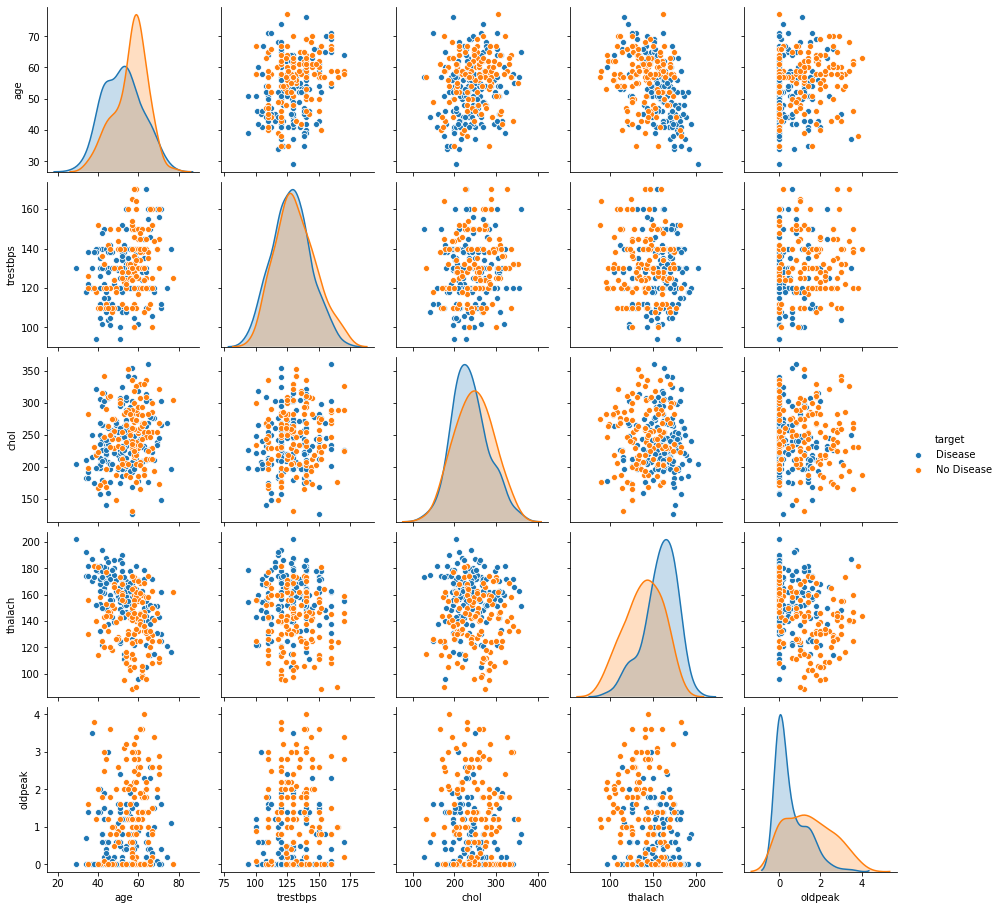

In [ ]:
sns.pairplot(dataset1,hue='target',vars=real_features, diag_kind='kde');

The columns used to make pairplots here are all the real valued or continuous features.

The non-diagonal pairplots represents the scatter plots which give the relation between two repective columns, column on x-axis and column on y-axis, for disease and non-disease targets respectively. Whereas the diagonal plots show the density function of univariate features individually. In this, x-axis is converted into bins or range of values and y-axis represents count or frequency of a particular value in that range in the dataset. This forms a histogram which is later converted to density plots using the average of the values.

**Coorelation HeatMap for all the features -**

(14.5, -0.5)

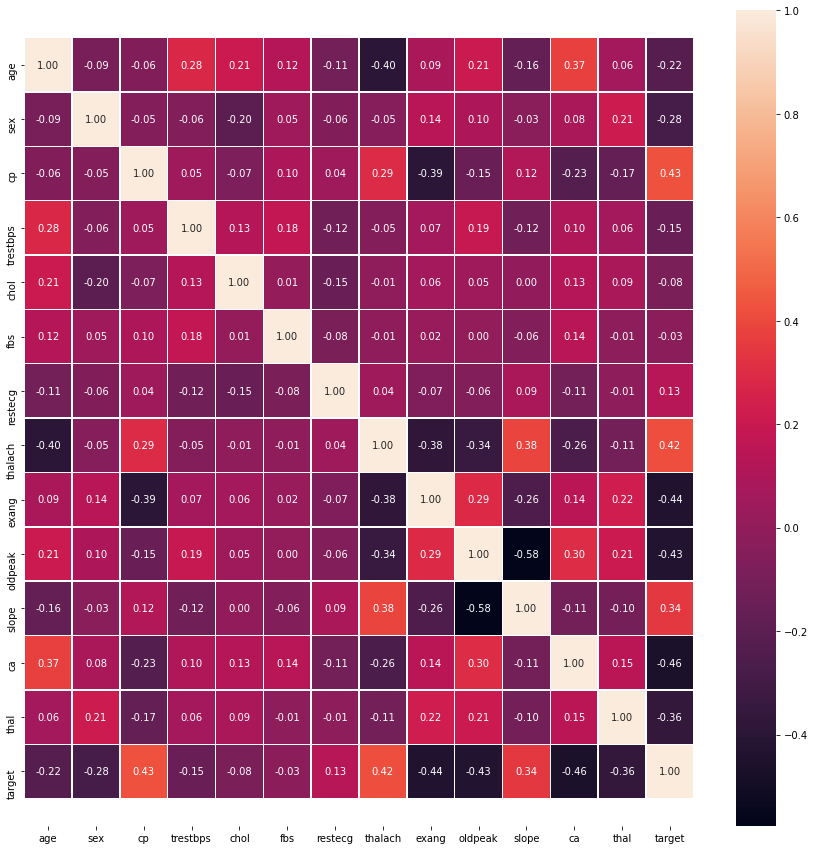

In [ ]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

From the above heatmap, no 2 real-valued columns show that much coorelation that we can combine them and reduce the dimensions.
But 'cp' and 'thalach' show good positive coorelation with 'target' while 'exang', 'oldpeak' and 'ca' show good negative coorelation with the target column.

I have also tried to apply PCA dimensionality reduction technique on 'age' and 'thalach' looking at their correlation i.e. '-0.40' but that gave the same result in some models while even worse in some models.

###**Data Preprocessing**

In [ ]:
dataset1.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymtomatic,145,233,True,0,150,No,2.3,upsloping,0.0,fixed_defect,Disease
1,37,Male,non-angical pain,130,250,False,1,187,No,3.5,upsloping,0.0,reversable_defect,Disease
2,41,Female,atypical_angina,130,204,False,0,172,No,1.4,downsloping,0.0,reversable_defect,Disease
3,56,Male,atypical_angina,120,236,False,1,178,No,0.8,downsloping,0.0,reversable_defect,Disease
4,57,Female,typical_angina,120,354,False,1,163,Yes,0.6,downsloping,0.0,reversable_defect,Disease
5,57,Male,typical_angina,140,192,False,1,148,No,0.4,flat,0.0,fixed_defect,Disease
6,56,Female,atypical_angina,140,294,False,0,153,No,1.3,flat,0.0,reversable_defect,Disease
7,44,Male,atypical_angina,120,263,False,1,173,No,0.0,downsloping,0.0,normal,Disease
9,57,Male,non-angical pain,150,168,False,1,174,No,1.6,downsloping,0.0,reversable_defect,Disease
10,54,Male,typical_angina,140,239,False,1,160,No,1.2,downsloping,0.0,reversable_defect,Disease


Splitting the dataset into arrays of Features (x) and Labels (y)

In [ ]:
x = dataset1.iloc[:,:-1].values
y = dataset1.iloc[:,-1].values

In [ ]:
print(x)
print(y)

[[63 'Male' 'asymtomatic' ... 'upsloping' 0.0 'fixed_defect']
 [37 'Male' 'non-angical pain' ... 'upsloping' 0.0 'reversable_defect']
 [41 'Female' 'atypical_angina' ... 'downsloping' 0.0 'reversable_defect']
 ...
 [68 'Male' 'typical_angina' ... 'flat' 2.0 'normal']
 [57 'Male' 'typical_angina' ... 'flat' 1.0 'normal']
 [57 'Female' 'atypical_angina' ... 'flat' 1.0 'reversable_defect']]
['Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease'
 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease'
 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease'
 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease'
 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease'
 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease'
 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease'
 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease' 'Disease'
 'Disease' 'Disease' 'Disease' 'Disease' 

Encoding the categorical data (more than 2 categories) - Features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers =[('encoder',OneHotEncoder(),[2,6,10,11,12])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[1.0 0.0 0.0 ... 150 'No' 2.3]
 [0.0 0.0 1.0 ... 187 'No' 3.5]
 [0.0 1.0 0.0 ... 172 'No' 1.4]
 ...
 [0.0 0.0 0.0 ... 141 'No' 3.4]
 [0.0 0.0 0.0 ... 115 'Yes' 1.2]
 [0.0 1.0 0.0 ... 174 'No' 0.0]]


Encoding the categorical data (with 2 categories) - Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Encoding the categorical data (with 2 categories) - Features

In [ ]:
print(x[0])

[1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 63
 'Male' 145 233 'True' 150 'No' 2.3]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
x[:,18] = le1.fit_transform(x[:,18])
le2 = LabelEncoder()
x[:,21] = le2.fit_transform(x[:,21])
le3 = LabelEncoder()
x[:,23] = le3.fit_transform(x[:,23])

In [ ]:
print(x[0])

[1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 63 1
 145 233 1 150 0 2.3]


Splitting the dataset into Training and Testing set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train)

[[0.0 0.0 0.0 ... 140 1 3.6]
 [0.0 0.0 1.0 ... 157 0 1.6]
 [0.0 0.0 0.0 ... 122 0 1.0]
 ...
 [0.0 0.0 1.0 ... 133 0 0.2]
 [0.0 0.0 0.0 ... 130 1 2.0]
 [0.0 0.0 0.0 ... 152 1 0.2]]


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,[17,19,20,22,24]] = sc.fit_transform(x_train[:,[17,19,20,22,24]])
x_test[:,[17,19,20,22,24]] = sc.transform(x_test[:,[17,19,20,22,24]])

In [ ]:
print(x_train[0])

[0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0
 0.7582385330180448 1 -0.6153385024894399 0.4393833720196561 0
 -0.46012527023481664 1 2.5217651496918387]


###**Machine Learning Models**

Creating a method to print score of the model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
def print_score(y_test, y_pred, classifier):
  print('Test set score for '+classifier+' - \n')
  print('Accuracy Score : '+str(round(accuracy_score(y_test, y_pred)*100,2))+' %')
  print('Precision Score : '+str(round(precision_score(y_test, y_pred)*100,2))+' %')
  print('Recall Score : '+str(round(recall_score(y_test, y_pred)*100,2))+' %')
  print('F1 Score : '+str(round(f1_score(y_test, y_pred)*100,2))+' %')
  print('Confusion Matrix : ',confusion_matrix(y_test,y_pred))

Support Vector Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()

parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

sv_classifier = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

sv_classifier.fit(x_train, y_train)

y_pred_svc = sv_classifier.predict(x_test)

print_score(y_test, y_pred_svc,'Support Vector Classifier')

Test set score for Support Vector Classifier - 

Accuracy Score : 82.46 %
Precision Score : 86.96 %
Recall Score : 74.07 %
F1 Score : 80.0 %
Confusion Matrix :  [[27  3]
 [ 7 20]]


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(random_state=42)

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          }

dt_classifier = GridSearchCV(estimator = dtc,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

dt_classifier.fit(x_train, y_train)

y_pred_dtc = dt_classifier.predict(x_test)

print_score(y_test, y_pred_dtc,'Decision Tree Classifier')

Test set score for Decision Tree Classifier - 

Accuracy Score : 82.46 %
Precision Score : 79.31 %
Recall Score : 85.19 %
F1 Score : 82.14 %
Confusion Matrix :  [[24  6]
 [ 4 23]]


XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 500, 900, 1100, 1500]
learning_rate = [0.05, 0.1, 0.15, 0.20]

parameters = {'n_estimators': n_estimators,
                       'learning_rate' : learning_rate, 
                      }

xgb = XGBClassifier()

xg_classifier = GridSearchCV(estimator = xgb,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

xg_classifier.fit(x_train, y_train)

y_pred_xgb = xg_classifier.predict(x_test)

print_score(y_test, y_pred_xgb,'XGBoost Classifier')

Test set score for XGBoost Classifier - 

Accuracy Score : 84.21 %
Precision Score : 84.62 %
Recall Score : 81.48 %
F1 Score : 83.02 %
Confusion Matrix :  [[26  4]
 [ 5 22]]


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

y_pred_lr = lr_classifier.predict(x_test)
y_proba_lr = lr_classifier.predict_proba(x_test)
print_score(y_test, y_pred_lr, 'Logistic Regression')
print(y_proba_lr)

Test set score for Logistic Regression - 

Accuracy Score : 85.96 %
Precision Score : 88.0 %
Recall Score : 81.48 %
F1 Score : 84.62 %
Confusion Matrix :  [[27  3]
 [ 5 22]]
[[0.83554691 0.16445309]
 [0.367494   0.632506  ]
 [0.82017747 0.17982253]
 [0.25292821 0.74707179]
 [0.90315021 0.09684979]
 [0.3577225  0.6422775 ]
 [0.63522276 0.36477724]
 [0.00633745 0.99366255]
 [0.91451842 0.08548158]
 [0.05659127 0.94340873]
 [0.96584833 0.03415167]
 [0.03330383 0.96669617]
 [0.93373457 0.06626543]
 [0.76127589 0.23872411]
 [0.73679341 0.26320659]
 [0.11570221 0.88429779]
 [0.76004073 0.23995927]
 [0.34743109 0.65256891]
 [0.04617771 0.95382229]
 [0.90998112 0.09001888]
 [0.99407107 0.00592893]
 [0.96103117 0.03896883]
 [0.52215781 0.47784219]
 [0.41964616 0.58035384]
 [0.97670194 0.02329806]
 [0.33716386 0.66283614]
 [0.46688572 0.53311428]
 [0.01968621 0.98031379]
 [0.01072117 0.98927883]
 [0.92525892 0.07474108]
 [0.00412595 0.99587405]
 [0.33416319 0.66583681]
 [0.9141281  0.0858719 ]
 

K-Nearest-Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(x_train, y_train)

y_pred_knn = knn_classifier.predict(x_test)

print_score(y_test, y_pred_knn, 'K-Nearest-Neighbor Classifier')

Test set score for K-Nearest-Neighbor Classifier - 

Accuracy Score : 78.95 %
Precision Score : 85.71 %
Recall Score : 66.67 %
F1 Score : 75.0 %
Confusion Matrix :  [[27  3]
 [ 9 18]]


Random Forest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

params = {'n_estimators': n_estimators}

rfc = RandomForestClassifier(random_state=42)

rf_classifier = GridSearchCV(estimator = rfc,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

rf_classifier.fit(x_train, y_train)

y_pred_rfc = rf_classifier.predict(x_test)

print_score(y_test, y_pred_rfc, 'Random Forest Classifier')


Test set score for Random Forest Classifier - 

Accuracy Score : 80.7 %
Precision Score : 83.33 %
Recall Score : 74.07 %
F1 Score : 78.43 %
Confusion Matrix :  [[26  4]
 [ 7 20]]


### **Model's results**

|S.No. | Classifier Model | Accuracy Score | Precision Score | Recall Score | F1 Score
| --- | --- | --- | --- | --- | --- |
| 1 | Support Vector Classifier | 82.46 | 86.96 | 74.07 | 80.0 |
| 2 | Decision Tree Classifier | 82.46 | 79.31 | 85.19 | 82.14 |
| 3 | XGBoost Classifier | 84.21 | 84.62 | 81.48 | 83.02 |
| 4 | Logistic Regression | 85.96 | 88.0 | 81.48 | 84.62 |
| 5 | KNN Classifier | 78.95 | 85.71 | 66.67 | 75.0 |
| 6 | Random Forest Classifier | 80.7 | 83.33 | 74.07 | 78.43 |

So, the model with maximum accuracy and f1 score is selected - Logistic Regression.